In [1]:
import numpy as np
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt

In [2]:
def load_data():
    dataMat = []
    dataLabel = []
    
    #按空格分开
    file = pd.read_csv("ex0.txt", header=None, sep="\t")
    dataMat = np.array(file[[0,1]])
    dataLabel = np.array(file[[2]])
    #111
    return dataMat, dataLabel

普通线性

In [3]:
#判断是否能求逆运算
def standRegression(dataMat, dataLabel):
    x = np.mat(dataMat)
    y = np.mat(dataLabel).T
    xTx = x.T * x
    if linalg.det(xTx) == 0.0:
        print("cannot inverse")
        return 
    ws = xTx.I * (x.T* y.T)  #计算权重
    return ws

In [4]:
dataMat, dataLabel = load_data()
ws = standRegression(dataMat, dataLabel)

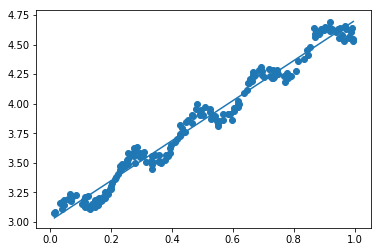

In [5]:
dataMat = np.mat(dataMat)
dataLabel = np.mat(dataLabel)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:,1].flatten().A[0], dataLabel[:,0].flatten().A[0])
dataMat2 = dataMat.copy()
dataMat2.sort(0)
yy = dataMat2*ws   #预测值
ax.plot(dataMat2[:,1], yy)
plt.show()

In [6]:
#计算预测值和真实值之间的相关性
np.corrcoef(yy.T, dataLabel.T)

array([[1.        , 0.13653777],
       [0.13653777, 1.        ]])

局部加权回归

In [7]:
def lwlr(testpoint, dataMat, dataLabel, k=1.0):
    dataMat = np.mat(dataMat)
    dataLabel = np.mat(dataLabel).T
    m, n = dataMat.shape
    weights = np.eye(m)   #中间为1的对角矩阵
    for i in range(m):
        #要计算的点和其他点的差
        diff = testpoint - dataMat[i,:]
        #采用高斯定义函数
        weights[i][i] = np.exp(diff*diff.T / (-2.0*k**2))
    #某个点，然后其他点的权重
    xTx = dataMat.T*weights*dataMat   #(n,m)(m,m)(m, 1) = (2,2)
    
    if np.linalg.det(xTx) == 0.0:
        print("not inverse")
        return 
    ws = xTx.I * (dataMat.T * (weights * dataLabel.T))
    return testpoint * ws

In [8]:
def lwlrtest(testarr, dataMat, dataLabel, k=1.0):
    m = testarr.shape[0]
    y = np.zeros(m)
    for i in range(m):
        y[i] = lwlr(testarr[i], dataMat, dataLabel, k)
    return y

In [9]:
dataMat, dataLabel = load_data()
lwlr(dataMat[0], dataMat, dataLabel, k=1.0)

matrix([[3.12204471]])

In [10]:
#进行预测
result = lwlrtest(dataMat, dataMat, dataLabel, k=0.003)
result2 = lwlrtest(dataMat, dataMat, dataLabel, k=1.0)
result3 = lwlrtest(dataMat, dataMat, dataLabel, k=0.05)

In [11]:
dataMat = np.mat(dataMat)
#进行排序后得到小标
index_id = dataMat[:, 1].argsort(0)
s_sort = dataMat[index_id][:,0,:]

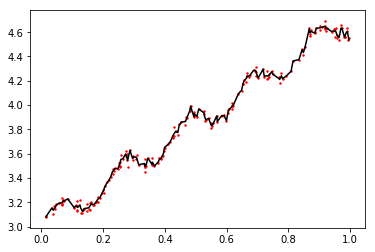

In [12]:
#画图
# k=0.003会出现过拟合的情况
fig = plt.figure()
ax = fig.add_subplot(111)
dataLabel = np.mat(dataLabel)
ax.plot(s_sort[:,1], result[index_id], c='black')
ax.scatter(dataMat[:,1].flatten().A[0], dataLabel[:,0].flatten().A[0], s=2, c='red')
plt.show()

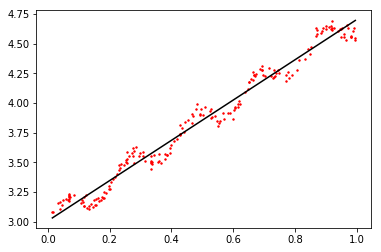

In [13]:
#k=1会出现欠拟合的情况
fig = plt.figure()
ax = fig.add_subplot(111)
dataLabel = np.mat(dataLabel)
ax.plot(s_sort[:,1], result2[index_id], c='black')
ax.scatter(dataMat[:,1].flatten().A[0], dataLabel[:,0].flatten().A[0], s=2, c='red')
plt.show()

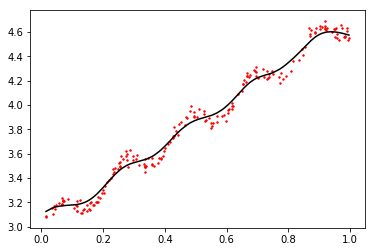

In [14]:
#k=0.05较为合适
fig = plt.figure()
ax = fig.add_subplot(111)
dataLabel = np.mat(dataLabel)
ax.plot(s_sort[:,1], result3[index_id], c='black')
ax.scatter(dataMat[:,1].flatten().A[0], dataLabel[:,0].flatten().A[0], s=2, c='red')
plt.show()

岭回归

In [15]:
def load_data():
    dataMat = []
    dataLabel = []
    
    #按空格分开
    file = pd.read_csv("abalone.txt", header=None, sep="\t")
    dataMat = np.array(file[[0,1]])
    dataLabel = np.array(file[[2]])
    #111
    return dataMat, dataLabel

In [16]:
def ridgeRegression(xmat, ymat, lam=0.2):
    xTx = xmat.T * xmat
    #xtx + lam*I
    demo = xTx + np.eye(xmat.shape[1]) * lam
    
    #判断是否可逆
    if np.linalg.det(demo) == 0.0:
        print("not inverse")
        return 
    #demo*x*y
    ws = demo * xmat.T * ymat
    return ws

In [17]:
def ridge_test(xarr, yarr):
    xarr = np.mat(xarr)
    yarr = np.mat(yarr)
    
    #将x，y进行标准化
    x_mean = np.mean(xarr, 0)
    x_var = np.var(xarr, 0)
    xmat = (xarr - x_mean) / x_var
    
    y_mean = np.mean(yarr, 0)
    ymat = yarr - y_mean
    
    num_test = 30
    
    wmat = np.zeros((num_test, xmat.shape[1]))
    #循环30次不同的lam对w的影响，保存不同的w
    for i in range(num_test):
        ws = ridgeRegression(xmat, ymat, np.exp(i-10))
        wmat[i,:] = ws.T
    return wmat

In [18]:
xmat, ymat = load_data()
wmat = ridge_test(xmat, ymat)

In [19]:
wmat.shape

(30, 2)

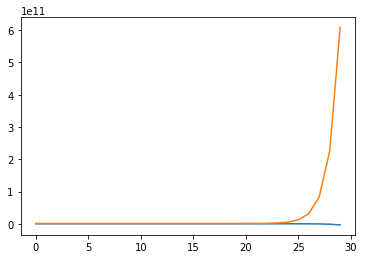

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(wmat)
plt.show()

lasso回归

In [69]:
def calerr(yarr, yhat):
    '''
    计算误差
    '''
    return sum((yarr - yhat)**2)

In [70]:
def stagew(xarr, yarr, eps=0.01, numit=100):
    #标准化
    xmat = np.mat(xarr)
    x_mean = np.mean(xmat, 0)
    x_var = np.var(xmat, 0)
    xmat = (xmat - x_mean) / x_var
    
    ymat = np.mat(yarr).T
    y_mean = np.mean(ymat, 0)
    ymat = ymat - y_mean
    
    m,n = xmat.shape
    
    #初始化权重
    ws = np.zeros((n,1))   #真正权重
    returnmat = np.zeros((numit, n))      #每一次迭代的权重
    
    wstest = ws.copy()     #用于存放每一次迭代的权重
    wsmax = ws.copy()      
    
    low_error  = np.float('inf')
    #迭代次数
    for i in range(numit):
        #初始化最小的错误
#         low_error  = np.float('inf')
#         print(ws.T)
        
        #遍历每一列，获取每一列的不同权重
        for j in range(n):
            for sign  in [-1, 1]:     #权重是+还是-
                wstest[j] += eps*sign
                
                
                #计算在这个权重下的yhat
                y_test = xmat * wstest  #(m, n) (1,n)
                #计算误差
                error = calerr(y_test, ymat)
                print(wstest[j])
                print(error)
                
                #如果误差小于当前的最小误差，该误差变为最小误差
                if error < low_error:
                    low_error = error
                    wsmax = wstest.copy()
        #获取到所有列的权重，即确定了当前所有误差
        ws = wsmax.copy()
        print(ws)
        returnmat[i,:]  = ws.T
    return returnmat

In [ ]:
xarr, yarr = load_data()
stagew(xarr, yarr, eps=0.01, numit=200)

In [ ]:
ws[0,2]

In [59]:
yarr

array([[0.365],
       [0.265],
       [0.42 ],
       ...,
       [0.475],
       [0.485],
       [0.555]])